## 1.Import library

In [506]:
import pandas as pd
import numpy as np
import hiveapp as pyhive
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Load data

In [507]:
df_inventory=pyhive.df_rows_details("DimInventory")


d:\DaiHoc\nam3ki2\DM\ProjectBDA\hiveapp.py:159: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"select * from {table_name}", connection)



 converting the rows_data into DataFrame 

converted successfully the rows_data into DataFrame


In [508]:
df_inventory.columns

Index(['diminventory.inventory_key', 'diminventory.inventory_id',
       'diminventory.title', 'diminventory.description',
       'diminventory.release_year', 'diminventory.language',
       'diminventory.rental_duration', 'diminventory.rental_rate',
       'diminventory.length', 'diminventory.replacement_cost',
       'diminventory.rating', 'diminventory.special_features',
       'diminventory.catalogy_name'],
      dtype='object')

In [509]:
df_rental=pyhive.df_rows_details("DimRental")


 converting the rows_data into DataFrame 

converted successfully the rows_data into DataFrame


In [510]:
df_inventory.columns

Index(['diminventory.inventory_key', 'diminventory.inventory_id',
       'diminventory.title', 'diminventory.description',
       'diminventory.release_year', 'diminventory.language',
       'diminventory.rental_duration', 'diminventory.rental_rate',
       'diminventory.length', 'diminventory.replacement_cost',
       'diminventory.rating', 'diminventory.special_features',
       'diminventory.catalogy_name'],
      dtype='object')

In [511]:
df_fact_inventory_analysis=pyhive.df_rows_details("Fact_Inventory_Analysis")


 converting the rows_data into DataFrame 

converted successfully the rows_data into DataFrame


In [512]:
df_fact_inventory_analysis.columns

Index(['fact_inventory_analysis.inventory_key',
       'fact_inventory_analysis.rental_key',
       'fact_inventory_analysis.orderdate_key',
       'fact_inventory_analysis.remaining',
       'fact_inventory_analysis.total_rental_amount'],
      dtype='object')

In [513]:
df_date=pyhive.df_rows_details("DimDate")


 converting the rows_data into DataFrame 

converted successfully the rows_data into DataFrame


In [514]:
df_date.columns

Index(['dimdate.date_key', 'dimdate.full_date', 'dimdate.day_of_week',
       'dimdate.day_num_in_month', 'dimdate.day_num_overall',
       'dimdate.day_name', 'dimdate.day_abbrev', 'dimdate.weekday_flag',
       'dimdate.week_num_in_year', 'dimdate.week_num_overall',
       'dimdate.week_begin_date', 'dimdate.week_begin_date_key',
       'dimdate.month', 'dimdate.month_num_overall', 'dimdate.month_name',
       'dimdate.month_abbrev', 'dimdate.quarter', 'dimdate.year',
       'dimdate.year_month', 'dimdate.fiscal_month', 'dimdate.fiscal_quarter',
       'dimdate.fiscal_year', 'dimdate.month_end_flag'],
      dtype='object')

> join dim inventory with fact_iventory_analysis

In [515]:
merged_df = pd.merge(df_fact_inventory_analysis, df_inventory,left_on='fact_inventory_analysis.inventory_key', right_on='diminventory.inventory_key', how='outer')


> join result with dim_rental

In [516]:
merged_df = pd.merge(merged_df, df_rental, left_on= "fact_inventory_analysis.rental_key" ,right_on="dimrental.rental_key", how='outer')

> join result with order_date

In [517]:
df_final = pd.merge(merged_df, df_date,left_on="fact_inventory_analysis.orderdate_key",right_on='dimdate.date_key', how='outer')

In [518]:
df_final.drop(columns=['diminventory.inventory_key', 'dimrental.rental_key', 'dimdate.date_key'], inplace=True,axis=1)

### 3. Exploratory Data Analyst

In [519]:
df_final.head(5)

,fact_inventory_analysis.inventory_key,fact_inventory_analysis.rental_key,fact_inventory_analysis.orderdate_key,fact_inventory_analysis.remaining,fact_inventory_analysis.total_rental_amount,diminventory.inventory_id,diminventory.title,diminventory.description,diminventory.release_year,diminventory.language,...,dimdate.month_num_overall,dimdate.month_name,dimdate.month_abbrev,dimdate.quarter,dimdate.year,dimdate.year_month,dimdate.fiscal_month,dimdate.fiscal_quarter,dimdate.fiscal_year,dimdate.month_end_flag
0,0.00,4860.00,19960101.00,4578.00,8.97,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientist who must Battle a Teacher in The Canadian Rockies,2006,English,...,1.00,January,Jan,1.00,1996.00,199601,7.00,3.00,1996.00,N
1,0.00,11428.00,19960102.00,4578.00,8.97,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientist who must Battle a Teacher in The Canadian Rockies,2006,English,...,1.00,January,Jan,1.00,1996.00,199601,7.00,3.00,1996.00,N
2,0.00,14709.00,19960103.00,4578.00,8.97,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientist who must Battle a Teacher in The Canadian Rockies,2006,English,...,1.00,January,Jan,1.00,1996.00,199601,7.00,3.00,1996.00,N
3,1.00,970.00,19960104.00,4576.00,7.95,2,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientist who must Battle a Teacher in The Canadian Rockies,2006,English,...,1.00,January,Jan,1.00,1996.00,199601,7.00,3.00,1996.00,N
4,1.00,2115.00,19960105.00,4576.00,7.95,2,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientist who must Battle a Teacher in The Canadian Rockies,2006,English,...,1.00,January,Jan,1.00,1996.00,199601,7.00,3.00,1996.00,N


In [520]:
df_final.shape

(16045, 47)

In [521]:
df_final.columns

Index(['fact_inventory_analysis.inventory_key',
       'fact_inventory_analysis.rental_key',
       'fact_inventory_analysis.orderdate_key',
       'fact_inventory_analysis.remaining',
       'fact_inventory_analysis.total_rental_amount',
       'diminventory.inventory_id', 'diminventory.title',
       'diminventory.description', 'diminventory.release_year',
       'diminventory.language', 'diminventory.rental_duration',
       'diminventory.rental_rate', 'diminventory.length',
       'diminventory.replacement_cost', 'diminventory.rating',
       'diminventory.special_features', 'diminventory.catalogy_name',
       'dimrental.rental_id', 'dimrental.rental_date',
       'dimrental.inventory_id', 'dimrental.return_date', 'dimrental.staff_id',
       'dimrental.payment_id', 'dimrental.amount', 'dimrental.payment_date',
       'dimdate.full_date', 'dimdate.day_of_week', 'dimdate.day_num_in_month',
       'dimdate.day_num_overall', 'dimdate.day_name', 'dimdate.day_abbrev',
       'dimdate.w

### 3.1 Overrall 
> After querying and combining the fact records with all dim tables, we see a total of (16045 rows, 47 columns)

#### 3.1.1 Structure of dataset

In [522]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16045 entries, 0 to 16044
Data columns (total 47 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   fact_inventory_analysis.inventory_key        16044 non-null  float64
 1   fact_inventory_analysis.rental_key           16044 non-null  float64
 2   fact_inventory_analysis.orderdate_key        2191 non-null   float64
 3   fact_inventory_analysis.remaining            16044 non-null  float64
 4   fact_inventory_analysis.total_rental_amount  16044 non-null  float64
 5   diminventory.inventory_id                    16045 non-null  int64  
 6   diminventory.title                           16045 non-null  object 
 7   diminventory.description                     16045 non-null  object 
 8   diminventory.release_year                    16045 non-null  int64  
 9   diminventory.language                        16045 non-null  object 
 10

#### 3.1.2 Summary of statistic

In [523]:
df_final.describe()

,fact_inventory_analysis.inventory_key,fact_inventory_analysis.rental_key,fact_inventory_analysis.orderdate_key,fact_inventory_analysis.remaining,fact_inventory_analysis.total_rental_amount,diminventory.inventory_id,diminventory.release_year,diminventory.rental_duration,diminventory.rental_rate,diminventory.length,...,dimdate.day_num_in_month,dimdate.day_num_overall,dimdate.week_num_in_year,dimdate.week_num_overall,dimdate.month_num_overall,dimdate.quarter,dimdate.year,dimdate.fiscal_month,dimdate.fiscal_quarter,dimdate.fiscal_year
count,16044.00,16044.00,2191.00,16044.00,16044.00,16045.00,16045.00,16045.00,16045.00,16045.00,...,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00,2191.00
mean,2290.89,8021.50,19985651.69,4577.14,16.15,2291.70,2006.00,4.94,2.94,114.97,...,15.73,1096.00,26.92,159.33,36.50,2.51,1998.50,6.48,2.49,1999.00
std,1322.13,4631.65,17084.48,1.06,8.77,1322.29,0.00,1.40,1.65,40.10,...,8.80,632.63,15.07,91.82,20.78,1.12,1.71,3.46,1.12,1.78
min,0.00,0.00,19960101.00,4576.00,0.99,1.00,2006.00,3.00,0.99,46.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1996.00,1.00,1.00,1996.00
25%,1153.00,4010.75,19970701.50,4576.00,8.97,1154.00,2006.00,4.00,0.99,81.00,...,8.00,548.50,14.00,80.00,19.00,2.00,1997.00,3.00,1.00,1998.00
50%,2290.00,8021.50,19981231.00,4577.00,14.97,2291.00,2006.00,5.00,2.99,114.00,...,16.00,1096.00,27.00,159.00,36.00,3.00,1998.00,6.00,2.00,1999.00
75%,3432.00,12032.25,20000665.50,4578.00,21.96,3433.00,2006.00,6.00,4.99,148.00,...,23.00,1643.50,40.00,239.00,54.50,4.00,2000.00,9.00,3.00,2000.50
max,4580.00,16043.00,20011230.00,4580.00,46.95,4581.00,2006.00,7.00,4.99,185.00,...,31.00,2191.00,53.00,317.00,72.00,4.00,2001.00,12.00,4.00,2002.00


### 3.2 Data visualization

In [524]:
df_final.columns = df_final.columns.str.split('.').str.get(-1)

In [525]:
df_final.head(2)

,inventory_key,rental_key,orderdate_key,remaining,total_rental_amount,inventory_id,title,description,release_year,language,...,month_num_overall,month_name,month_abbrev,quarter,year,year_month,fiscal_month,fiscal_quarter,fiscal_year,month_end_flag
0,0.00,4860.00,19960101.00,4578.00,8.97,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientist who must Battle a Teacher in The Canadian Rockies,2006,English,...,1.00,January,Jan,1.00,1996.00,199601,7.00,3.00,1996.00,N
1,0.00,11428.00,19960102.00,4578.00,8.97,1,ACADEMY DINOSAUR,An Epic Drama of a Feminist And a Mad Scientist who must Battle a Teacher in The Canadian Rockies,2006,English,...,1.00,January,Jan,1.00,1996.00,199601,7.00,3.00,1996.00,N


> Total payment per year

In [526]:
total_payment_per_year= df_final.groupby("year")['total_rental_amount'].sum().reset_index()

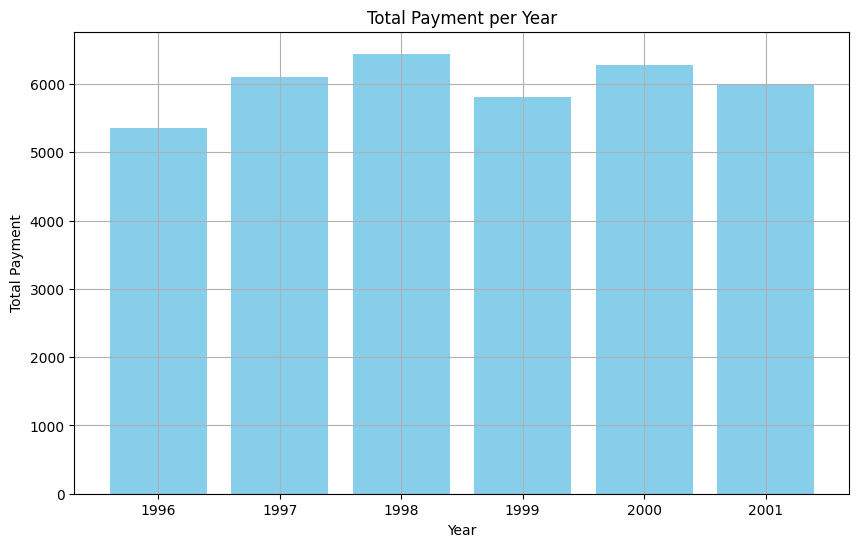

In [527]:

plt.figure(figsize=(10,6))
plt.bar(total_payment_per_year['year'],total_payment_per_year['total_rental_amount'],color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Payment')
plt.title('Total Payment per Year')
plt.grid(True)
plt.show()

> total_payment_per_quarter

In [528]:
total_payment_per_quarter=df_final.groupby("quarter")['total_rental_amount'].sum().reset_index()

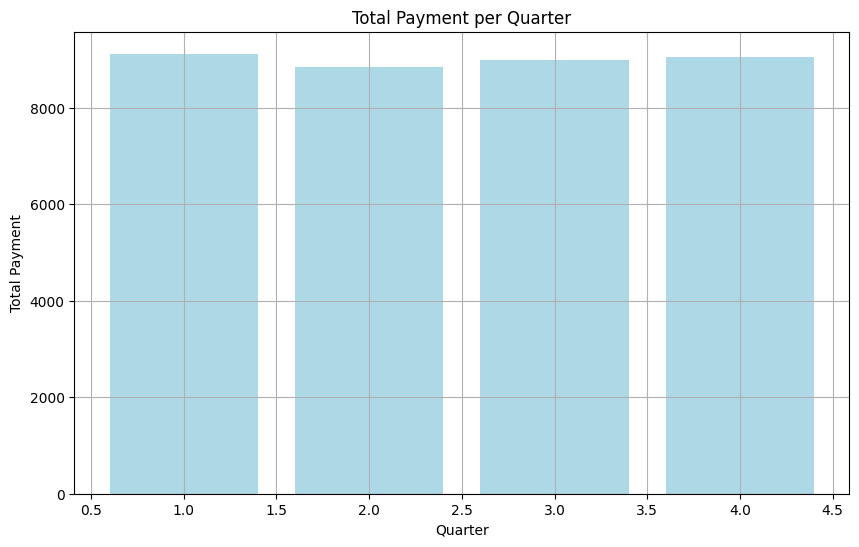

In [529]:
plt.figure(figsize=(10, 6))
plt.bar(total_payment_per_quarter['quarter'], total_payment_per_quarter['total_rental_amount'], color='lightblue')  # Đổi màu thành 'lightblue'
plt.xlabel('Quarter')
plt.ylabel('Total Payment')
plt.title('Total Payment per Quarter')
plt.grid(True)
plt.show()

> Distribution chart for 'rental_rate', 'length', 'replacement_cost', 'amount'

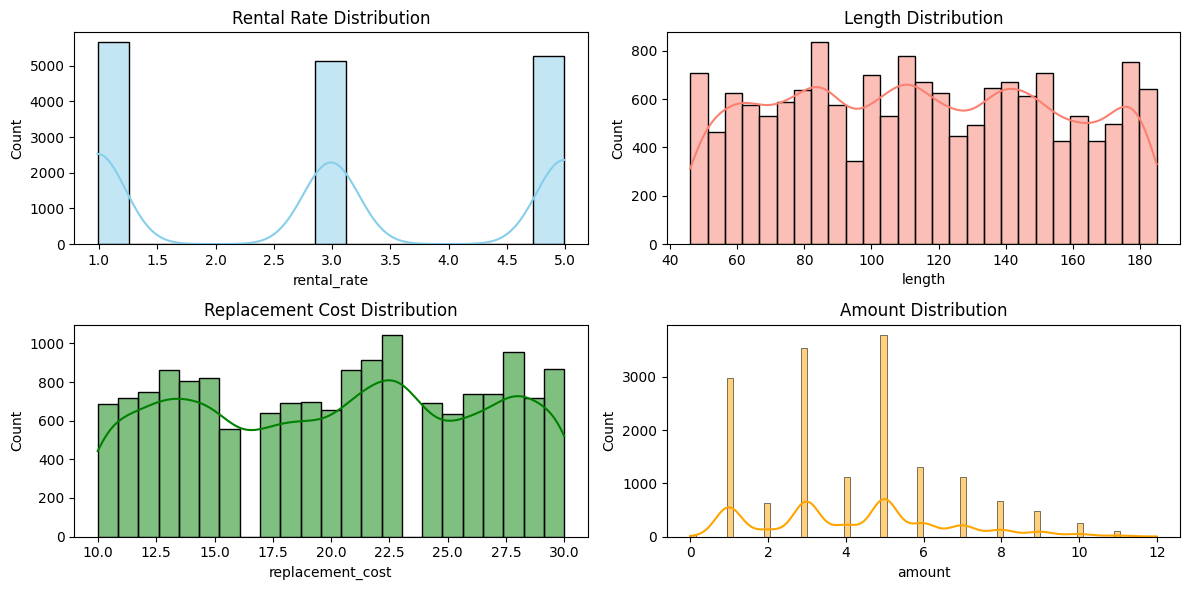

In [530]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_final['rental_rate'], kde=True, color='skyblue')
plt.title('Rental Rate Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df_final['length'], kde=True, color='salmon')
plt.title('Length Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df_final['replacement_cost'], kde=True, color='green')
plt.title('Replacement Cost Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df_final['amount'], kde=True, color='orange')
plt.title('Amount Distribution')

plt.tight_layout()
plt.show()

> Histogram for 'language', 'catalogy_name'

C:\Users\hdang\AppData\Local\Temp\ipykernel_6428\448011765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='language', palette='Set2')
C:\Users\hdang\AppData\Local\Temp\ipykernel_6428\448011765.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='catalogy_name', palette='Set2')


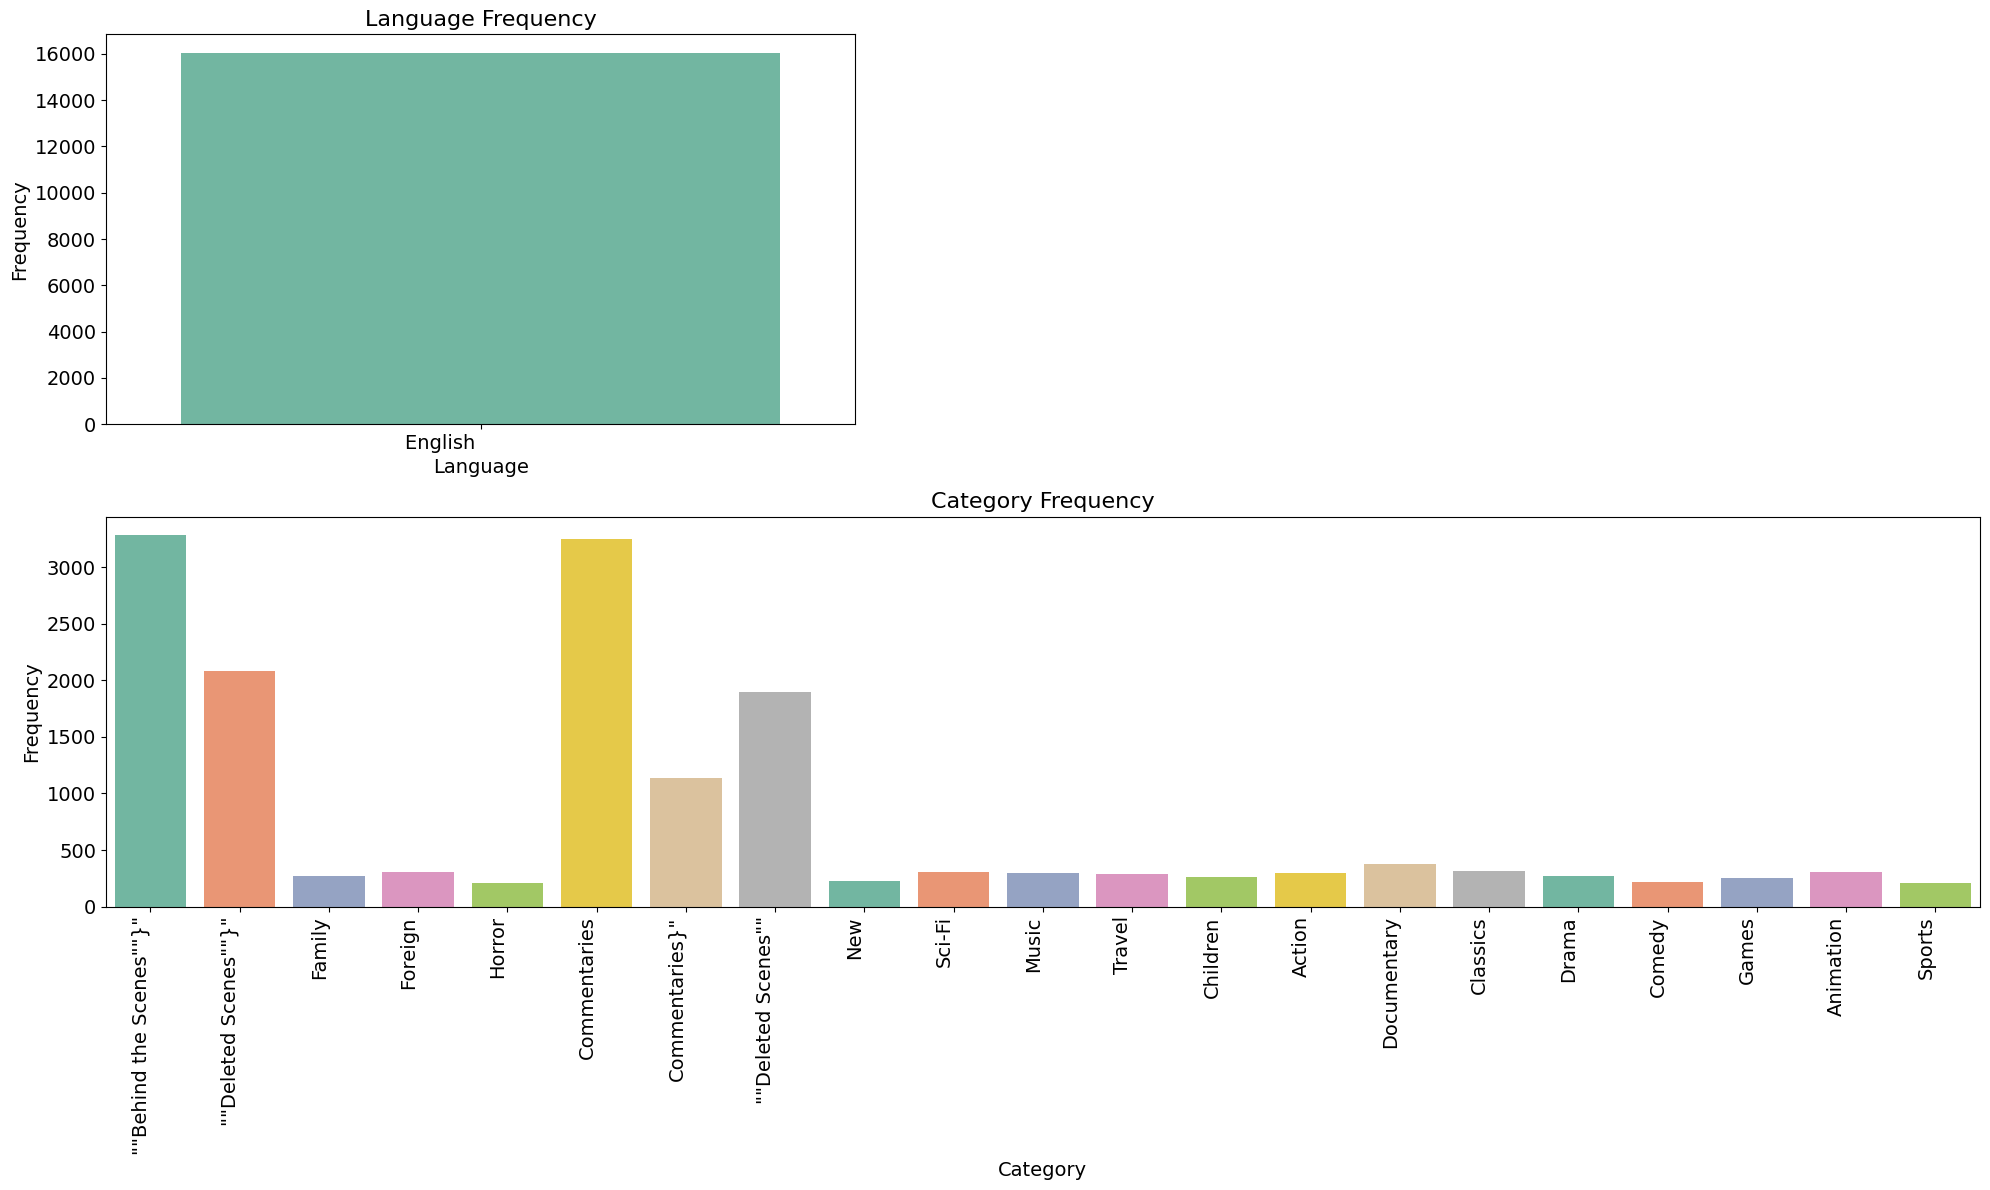

In [531]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
sns.countplot(data=df_final, x='language', palette='Set2')
plt.title('Language Frequency', fontsize=16)
plt.xlabel('Language', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(2, 1, 2)
sns.countplot(data=df_final, x='catalogy_name', palette='Set2')
plt.title('Category Frequency', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)  # Khoảng cách giữa các subplot
plt.show()


> Correlation plot for pairs of variables

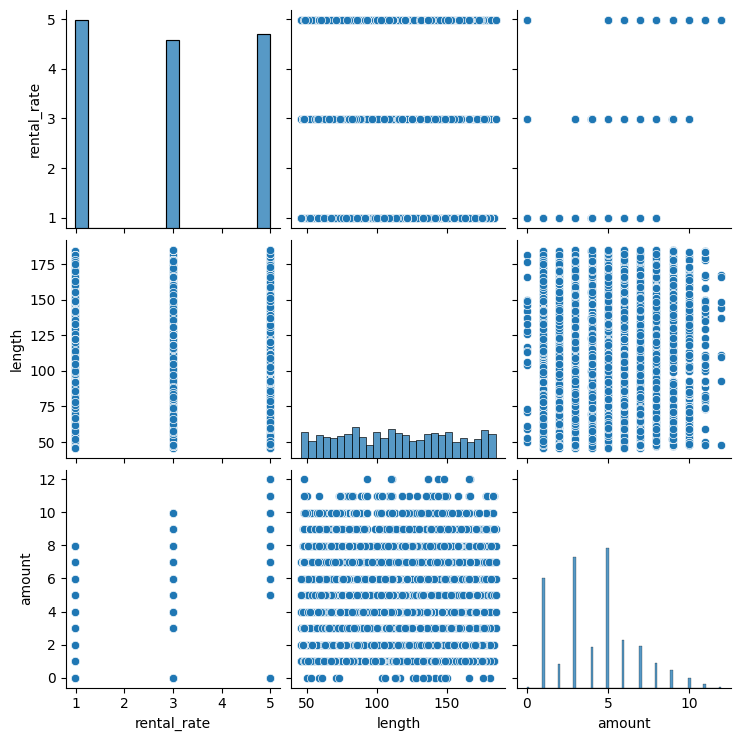

In [532]:
sns.pairplot(df_final[['rental_rate', 'length', 'amount']])
plt.show()

> Boxplot for 'language', 'catalogy_name'

C:\Users\hdang\AppData\Local\Temp\ipykernel_6428\2454687827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='language', y='total_rental_amount', palette='Set3')
C:\Users\hdang\AppData\Local\Temp\ipykernel_6428\2454687827.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='catalogy_name', y='total_rental_amount', palette='Set3')


Text(0.5, 1.0, 'Total Rental Amount by Category')

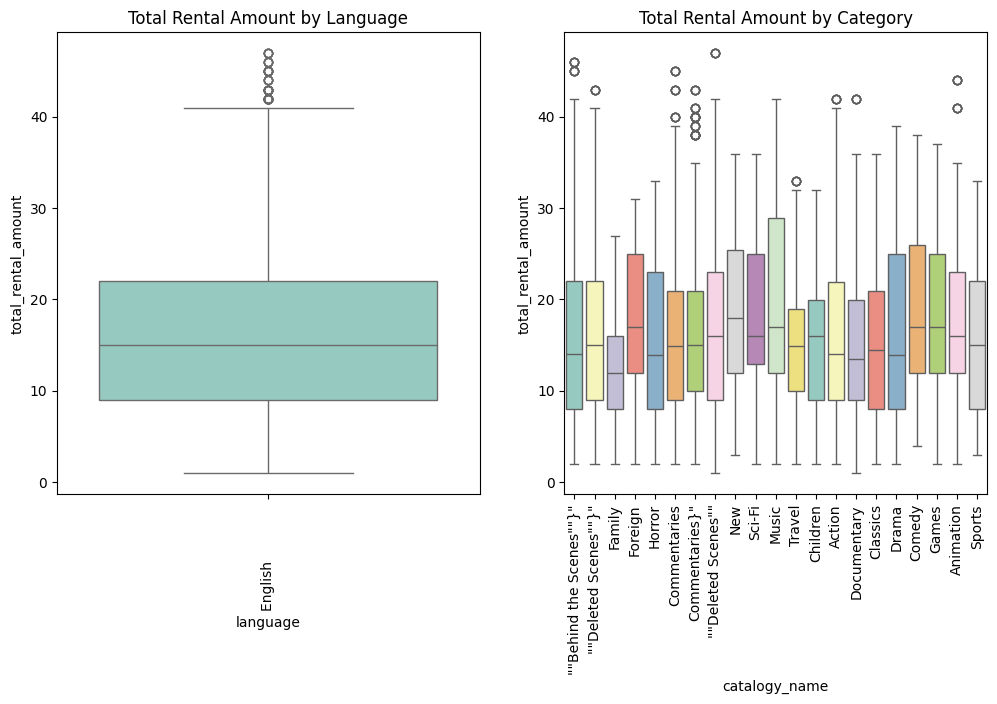

In [533]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_final, x='language', y='total_rental_amount', palette='Set3')
plt.xticks(rotation=90)
plt.title('Total Rental Amount by Language')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_final, x='catalogy_name', y='total_rental_amount', palette='Set3')
plt.xticks(rotation=90)
plt.title('Total Rental Amount by Category')

> Heatmap chart for correlation matrix

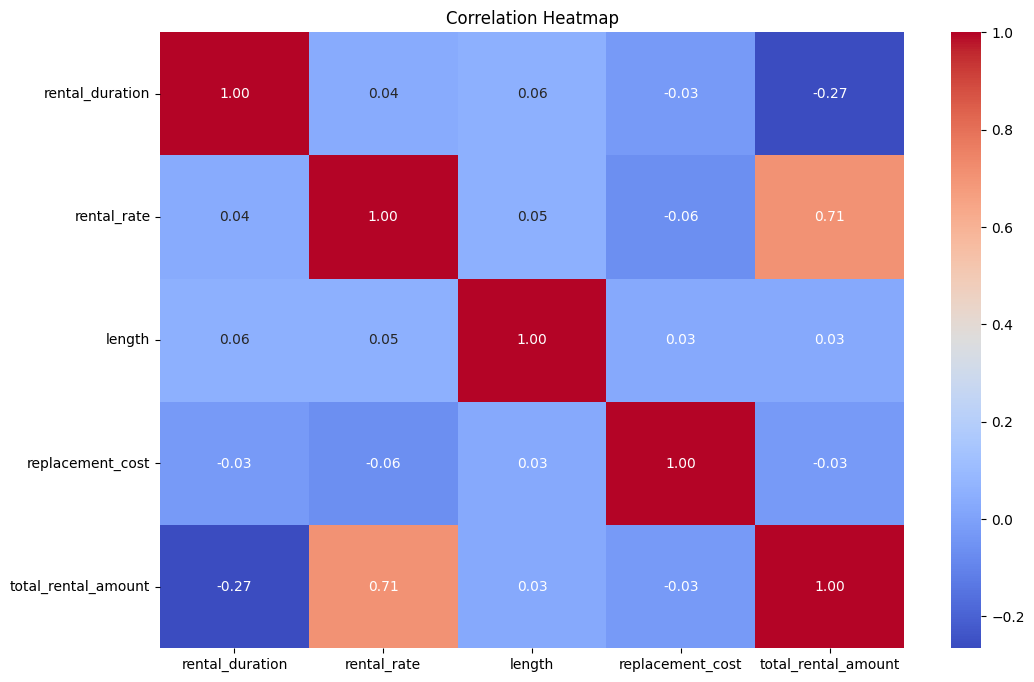

In [534]:
correlation_matrix = df_final[['rental_duration', 'rental_rate', 'length', 'replacement_cost', 'total_rental_amount']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### 3.3 Data Preprocessing

> handle missing values

In [535]:
df_final.isnull().sum()

inventory_key              1
rental_key                 1
orderdate_key          13854
remaining                  1
total_rental_amount        1
inventory_id               0
title                      0
description                0
release_year               0
language                   0
rental_duration            0
rental_rate                0
length                     0
replacement_cost           0
rating                     0
special_features           0
catalogy_name              0
rental_id                  1
rental_date                1
inventory_id               1
return_date                1
staff_id                   1
payment_id                 1
amount                     1
payment_date               1
full_date              13854
day_of_week            13854
day_num_in_month       13854
day_num_overall        13854
day_name               13854
day_abbrev             13854
weekday_flag           13854
week_num_in_year       13854
week_num_overall       13854
week_begin_dat

> Eliminate attributes that contain too many missing values

In [536]:
list_remove_columns=['orderdate_key','full_date', 'day_of_week',
       'day_num_in_month', 'day_num_overall', 'day_name', 'day_abbrev',
       'weekday_flag', 'week_num_in_year', 'week_num_overall',
       'week_begin_date', 'week_begin_date_key', 'month', 'month_num_overall',
       'month_name', 'month_abbrev', 'quarter', 'year', 'year_month',
       'fiscal_month', 'fiscal_quarter', 'fiscal_year', 'month_end_flag']
df_final.drop(columns=list_remove_columns, inplace=True,axis=1)


> Fill in the median value for numeric columns and fill in the common value for series because the variables are not normally distributed

In [537]:
# Điền giá trị trung vị vào các cột số còn thiếu
for column in df_final.select_dtypes(include=['float64', 'int64']).columns:
    df_final[column] = df_final[column].fillna(df_final[column].median())

# Điền giá trị phổ biến vào các cột chuỗi còn thiếu
for column in df_final.select_dtypes(include=['object']).columns:
    df_final[column] = df_final[column].fillna(df_final[column].mode()[0])


> Check 

In [538]:
df_final.isnull().sum()

inventory_key          0
rental_key             0
remaining              0
total_rental_amount    0
inventory_id           0
title                  0
description            0
release_year           0
language               0
rental_duration        0
rental_rate            0
length                 0
replacement_cost       0
rating                 0
special_features       0
catalogy_name          0
rental_id              0
rental_date            0
inventory_id           0
return_date            0
staff_id               0
payment_id             0
amount                 0
payment_date           0
dtype: int64

In [539]:
df_final.shape

(16045, 24)

> handle outliers

In [540]:
# Lọc ra các cột số
numeric_columns = df_final.select_dtypes(include=['float64', 'int64'])
# Loại bỏ các cột không cần thiết
exclude_columns = ['inventory_key', 'rental_key', 'title', 'description', 'language', 'special_features', 'catalogy_name', 'rental_id', 'inventory_id', 'staff_id', 'payment_id', 'payment_date', 'rental_date', 'return_date']
numeric_columns = numeric_columns.drop(columns=exclude_columns, errors='ignore')
# Tính toán các tứ phân vị
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Loại bỏ các giá trị ngoại lai
filtered_data = df_final[~((numeric_columns < lower_bound) | (numeric_columns > upper_bound)).any(axis=1)]



In [541]:
filtered_data.shape

(15162, 24)

> To avoid the phenomenon of multi-gravity in prediction problems leading to overfitting, we will eliminate attributes that are correlated with each other.

> remove rental_date 

In [542]:
filtered_data = filtered_data.drop("rental_date", axis=1)


## 4 Model